In [1]:
import pandas as pd # used to access the values present in our data
import numpy as np # Used to access the numerical values
import matplotlib.pyplot as plt #This library used for the visualisation data in graphical form
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv('crime.csv')
df

,year,murder,rape,kidnap,robbery,other_crimes,total_crimes,district
0,2001,161,100,92,646,3268,4267,ADILABAD
1,2001,276,46,106,947,3101,4476,ANANTAPUR
2,2001,158,54,118,1701,4344,6375,CHITTOOR
3,2001,133,40,50,449,2614,3286,CUDDAPAH
4,2001,149,46,98,2508,4523,7324,EAST GODAVARI
...,...,...,...,...,...,...,...,...
8592,2012,1,0,0,0,107,108,STF
8593,2012,89,158,908,4948,2143,8246,WEST
8594,2012,0,0,0,17,153,170,LAKSHADWEEP
8595,2012,11,12,4,187,746,960,KARAIKAL


In [11]:
print(df.isnull().sum())

year            0
murder          0
rape            0
kidnap          0
robbery         0
other_crimes    0
total_crimes    0
district        0
dtype: int64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8597 entries, 0 to 8596
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          8597 non-null   int64 
 1   murder        8597 non-null   int64 
 2   rape          8597 non-null   int64 
 3   kidnap        8597 non-null   int64 
 4   robbery       8597 non-null   int64 
 5   other_crimes  8597 non-null   int64 
 6   total_crimes  8597 non-null   int64 
 7   district      8597 non-null   object
dtypes: int64(7), object(1)
memory usage: 537.4+ KB


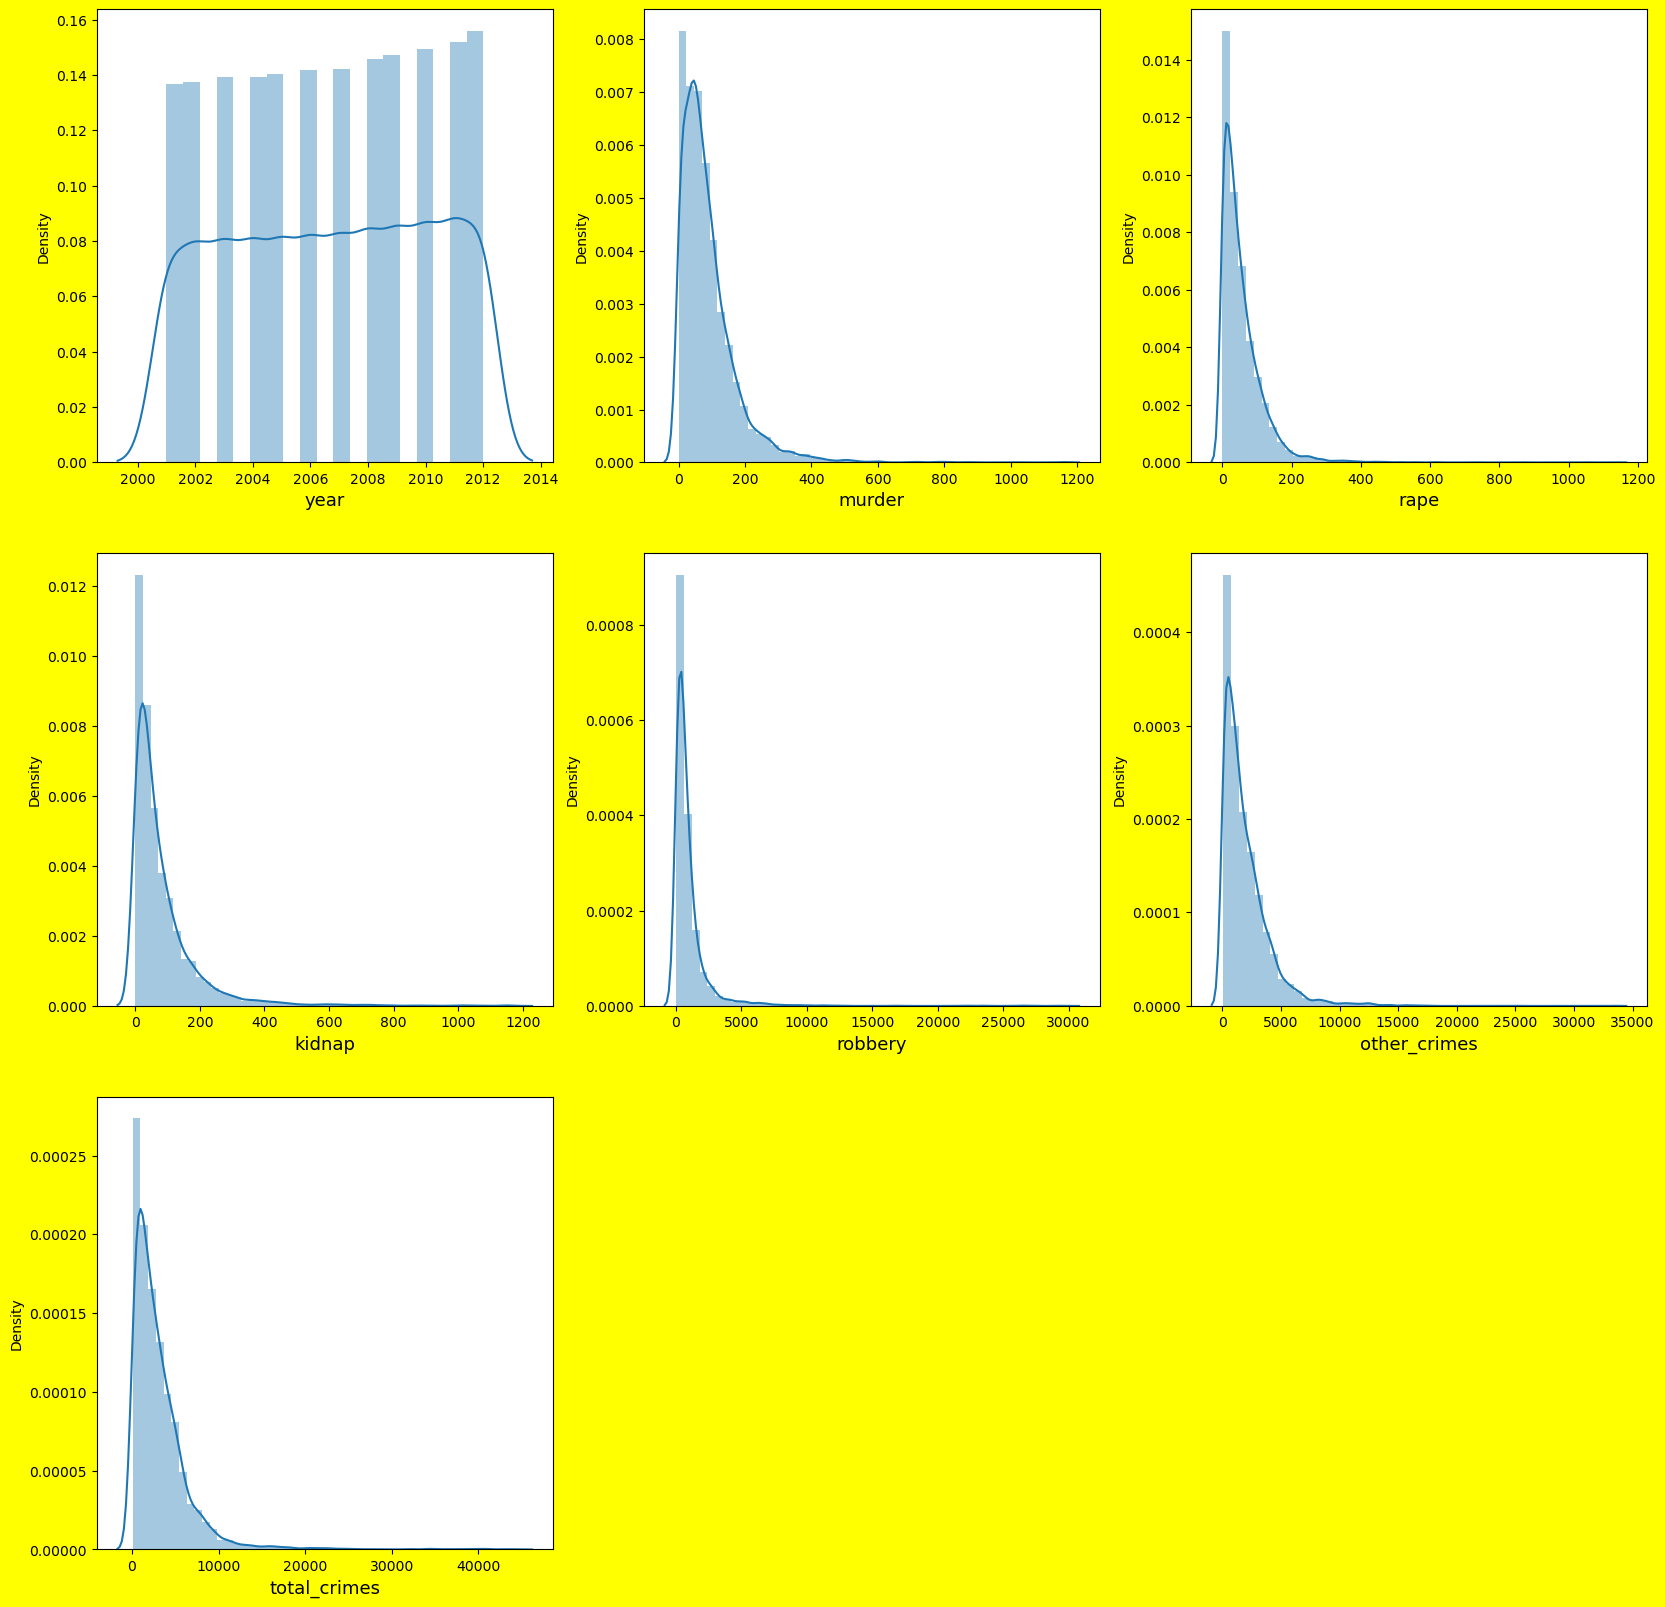

In [15]:
plt.figure(figsize=(20,20),facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber <=7 :
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=13)
        
    plotnumber+=1
plt.show()

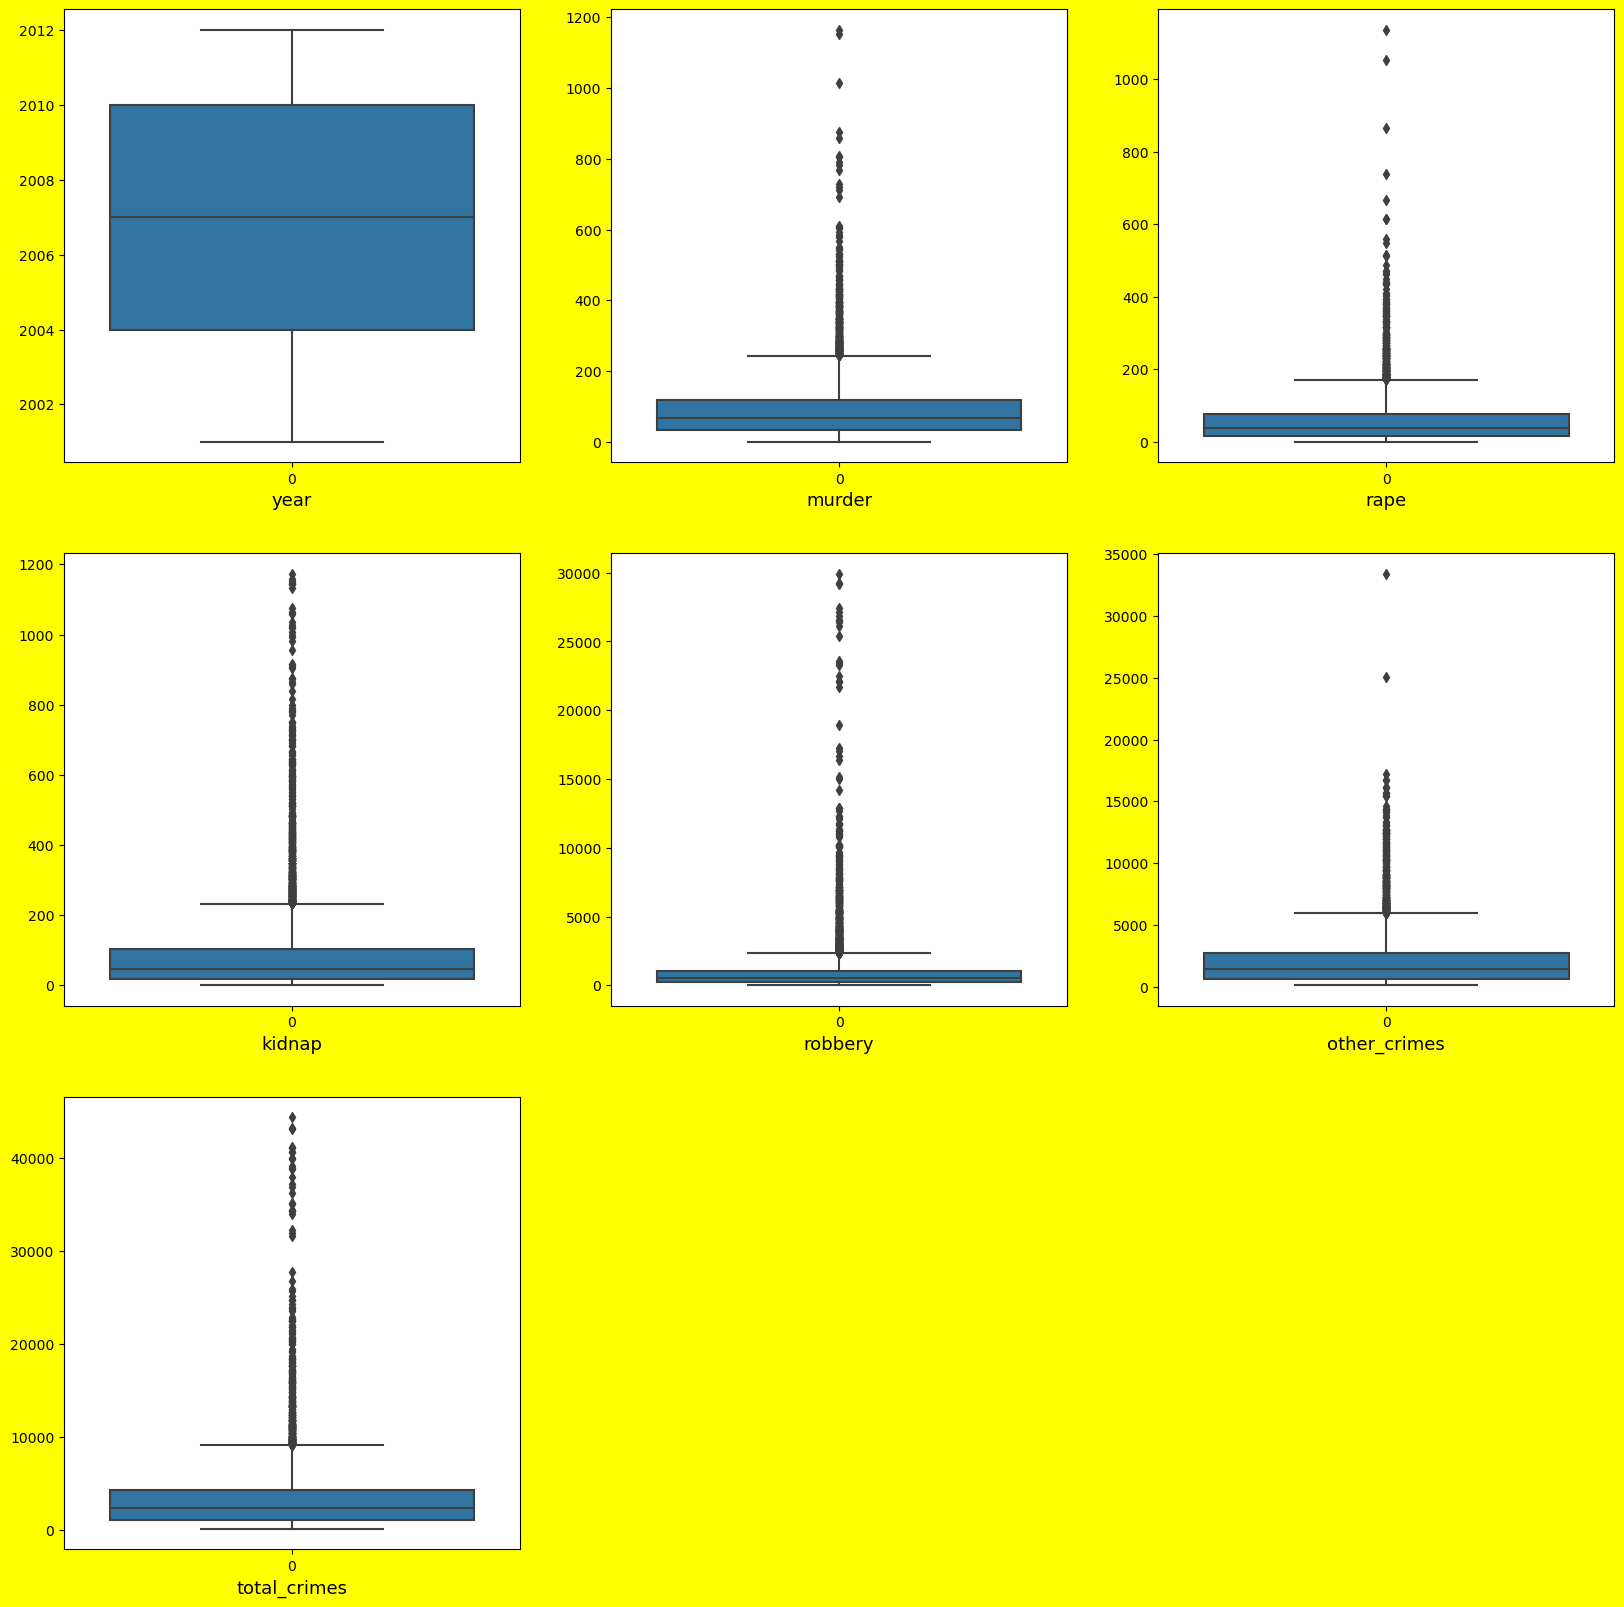

In [16]:
plt.figure(figsize=(20,20),facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber <=7 :
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=13)
        
    plotnumber+=1
plt.show()

In [17]:
#find the IQR - Inter quartile range to identify the outliers
q1= df.quantile(0.25)
q2= df.quantile(0.50)
q3= df.quantile(0.75)

iqr = q3 - q1

In [21]:
df.describe()

,year,murder,rape,kidnap,robbery,other_crimes,total_crimes
count,8597.000000,8597.00000,8597.000000,8597.000000,8597.000000,8597.000000,8597.000000
mean,2006.635338,87.76550,55.632663,83.018960,983.833430,1986.328138,3196.578690
std,3.464064,85.50098,61.795731,112.124305,1767.368229,2043.155880,3567.719962
min,2001.000000,0.00000,0.000000,0.000000,0.000000,104.000000,104.000000
25%,2004.000000,33.00000,16.000000,18.000000,237.000000,599.000000,1017.000000
50%,2007.000000,67.00000,38.000000,48.000000,533.000000,1403.000000,2303.000000
75%,2010.000000,117.00000,78.000000,104.000000,1078.000000,2734.000000,4270.000000
max,2012.000000,1164.00000,1136.000000,1174.000000,29936.000000,33451.000000,44444.000000


In [28]:
#Validating outlier
murder_high = (q3.murder + (1.5 * iqr.murder))
murder_high

243.0

In [25]:
#Indxes which have higher values
np_index = np.where(df['murder']> murder_high)
print(np_index)

(array([   1,    6,    8,   18,   80,   94,   96,   99,  109,  111,  198,
        203,  209,  211,  231,  239,  244,  304,  307,  309,  335,  356,
        499,  514,  554,  555,  556,  560,  561,  567,  570,  574,  579,
        582,  587,  595,  597,  600,  603,  604,  606,  608,  609,  610,
        616,  619,  622,  623,  682,  689,  693,  699,  754,  755,  761,
        764,  777,  780,  790,  814,  913,  921,  926,  927,  989,  993,
       1038, 1181, 1195, 1235, 1236, 1237, 1241, 1248, 1251, 1255, 1260,
       1263, 1276, 1278, 1281, 1284, 1285, 1287, 1289, 1290, 1297, 1300,
       1319, 1366, 1369, 1372, 1373, 1374, 1378, 1444, 1448, 1459, 1464,
       1467, 1470, 1472, 1473, 1477, 1479, 1609, 1614, 1732, 1875, 1889,
       1930, 1935, 1942, 1949, 1957, 1970, 1975, 1981, 1984, 1991, 2065,
       2066, 2071, 2074, 2138, 2141, 2157, 2160, 2163, 2165, 2172, 2294,
       2302, 2307, 2378, 2425, 2568, 2582, 2602, 2623, 2624, 2625, 2629,
       2636, 2639, 2643, 2648, 2651, 2664, 2669, 2

In [43]:
#dropping the indexes
df = df.drop(df.index[np_index])
df.shape

#resetting the indexes
df.reset_index()

,index,year,murder,rape,kidnap,robbery,other_crimes,total_crimes,district
0,0,2001,161,100,92,646,3268,4267,ADILABAD
1,3,2001,133,40,50,449,2614,3286,CUDDAPAH
2,5,2001,4,0,0,331,217,552,GUNTAKAL RLY.
3,9,2001,153,94,82,922,3545,4796,KHAMMAM
4,10,2001,116,74,72,1137,3699,5098,KRISHNA
...,...,...,...,...,...,...,...,...,...
6606,8584,2012,15,10,56,782,529,1392,NEW DELHI
6607,8592,2012,1,0,0,0,107,108,STF
6608,8594,2012,0,0,0,17,153,170,LAKSHADWEEP
6609,8595,2012,11,12,4,187,746,960,KARAIKAL


In [42]:
#Validating outlier
rape_high = (q3.rape + (1.5 * iqr.rape))
rape_high

#Indxes which have higher values
np_index = np.where(df['rape']> rape_high)
print(np_index)

#dropping the indexes
df = df.drop(df.index[np_index])
df.shape

#resetting the indexes
df.reset_index()

(array([], dtype=int64),)


,index,year,murder,rape,kidnap,robbery,other_crimes,total_crimes,district
0,0,2001,161,100,92,646,3268,4267,ADILABAD
1,3,2001,133,40,50,449,2614,3286,CUDDAPAH
2,5,2001,4,0,0,331,217,552,GUNTAKAL RLY.
3,9,2001,153,94,82,922,3545,4796,KHAMMAM
4,10,2001,116,74,72,1137,3699,5098,KRISHNA
...,...,...,...,...,...,...,...,...,...
6606,8584,2012,15,10,56,782,529,1392,NEW DELHI
6607,8592,2012,1,0,0,0,107,108,STF
6608,8594,2012,0,0,0,17,153,170,LAKSHADWEEP
6609,8595,2012,11,12,4,187,746,960,KARAIKAL


In [41]:
#Validating outlier
kidnap_high = (q3.kidnap + (1.5 * iqr.kidnap))
kidnap_high

#Indxes which have higher values
np_index = np.where(df['kidnap']> kidnap_high)
print(np_index)

#dropping the indexes
df = df.drop(df.index[np_index])
df.shape

#resetting the indexes
df.reset_index()

(array([], dtype=int64),)


,index,year,murder,rape,kidnap,robbery,other_crimes,total_crimes,district
0,0,2001,161,100,92,646,3268,4267,ADILABAD
1,3,2001,133,40,50,449,2614,3286,CUDDAPAH
2,5,2001,4,0,0,331,217,552,GUNTAKAL RLY.
3,9,2001,153,94,82,922,3545,4796,KHAMMAM
4,10,2001,116,74,72,1137,3699,5098,KRISHNA
...,...,...,...,...,...,...,...,...,...
6606,8584,2012,15,10,56,782,529,1392,NEW DELHI
6607,8592,2012,1,0,0,0,107,108,STF
6608,8594,2012,0,0,0,17,153,170,LAKSHADWEEP
6609,8595,2012,11,12,4,187,746,960,KARAIKAL


In [40]:
#Validating outlier
robbery_high = (q3.robbery + (1.5 * iqr.robbery))
robbery_high

#Indxes which have higher values
np_index = np.where(df['robbery']> robbery_high)
print(np_index)

#dropping the indexes
df = df.drop(df.index[np_index])
df.shape

#resetting the indexes
df.reset_index()

(array([], dtype=int64),)


,index,year,murder,rape,kidnap,robbery,other_crimes,total_crimes,district
0,0,2001,161,100,92,646,3268,4267,ADILABAD
1,3,2001,133,40,50,449,2614,3286,CUDDAPAH
2,5,2001,4,0,0,331,217,552,GUNTAKAL RLY.
3,9,2001,153,94,82,922,3545,4796,KHAMMAM
4,10,2001,116,74,72,1137,3699,5098,KRISHNA
...,...,...,...,...,...,...,...,...,...
6606,8584,2012,15,10,56,782,529,1392,NEW DELHI
6607,8592,2012,1,0,0,0,107,108,STF
6608,8594,2012,0,0,0,17,153,170,LAKSHADWEEP
6609,8595,2012,11,12,4,187,746,960,KARAIKAL


In [39]:
#Validating outlier
other_high = (q3.other_crimes + (1.5 * iqr.other_crimes))
other_high

#Indxes which have higher values
np_index = np.where(df['other_crimes']> other_high)
print(np_index)

#dropping the indexes
df = df.drop(df.index[np_index])
df.shape

#resetting the indexes
df.reset_index()

(array([], dtype=int64),)


,index,year,murder,rape,kidnap,robbery,other_crimes,total_crimes,district
0,0,2001,161,100,92,646,3268,4267,ADILABAD
1,3,2001,133,40,50,449,2614,3286,CUDDAPAH
2,5,2001,4,0,0,331,217,552,GUNTAKAL RLY.
3,9,2001,153,94,82,922,3545,4796,KHAMMAM
4,10,2001,116,74,72,1137,3699,5098,KRISHNA
...,...,...,...,...,...,...,...,...,...
6606,8584,2012,15,10,56,782,529,1392,NEW DELHI
6607,8592,2012,1,0,0,0,107,108,STF
6608,8594,2012,0,0,0,17,153,170,LAKSHADWEEP
6609,8595,2012,11,12,4,187,746,960,KARAIKAL


In [37]:
#Validating outlier
total_high = (q3.total_crimes + (1.5 * iqr.total_crimes))
total_high

#Indxes which have higher values
np_index = np.where(df['total_crimes']> other_high)
print(np_index)

#dropping the indexes
df = df.drop(df.index[np_index])
df.shape

#resetting the indexes
df.reset_index()

(array([], dtype=int64),)


,index,year,murder,rape,kidnap,robbery,other_crimes,total_crimes,district
0,0,2001,161,100,92,646,3268,4267,ADILABAD
1,3,2001,133,40,50,449,2614,3286,CUDDAPAH
2,5,2001,4,0,0,331,217,552,GUNTAKAL RLY.
3,9,2001,153,94,82,922,3545,4796,KHAMMAM
4,10,2001,116,74,72,1137,3699,5098,KRISHNA
...,...,...,...,...,...,...,...,...,...
6606,8584,2012,15,10,56,782,529,1392,NEW DELHI
6607,8592,2012,1,0,0,0,107,108,STF
6608,8594,2012,0,0,0,17,153,170,LAKSHADWEEP
6609,8595,2012,11,12,4,187,746,960,KARAIKAL


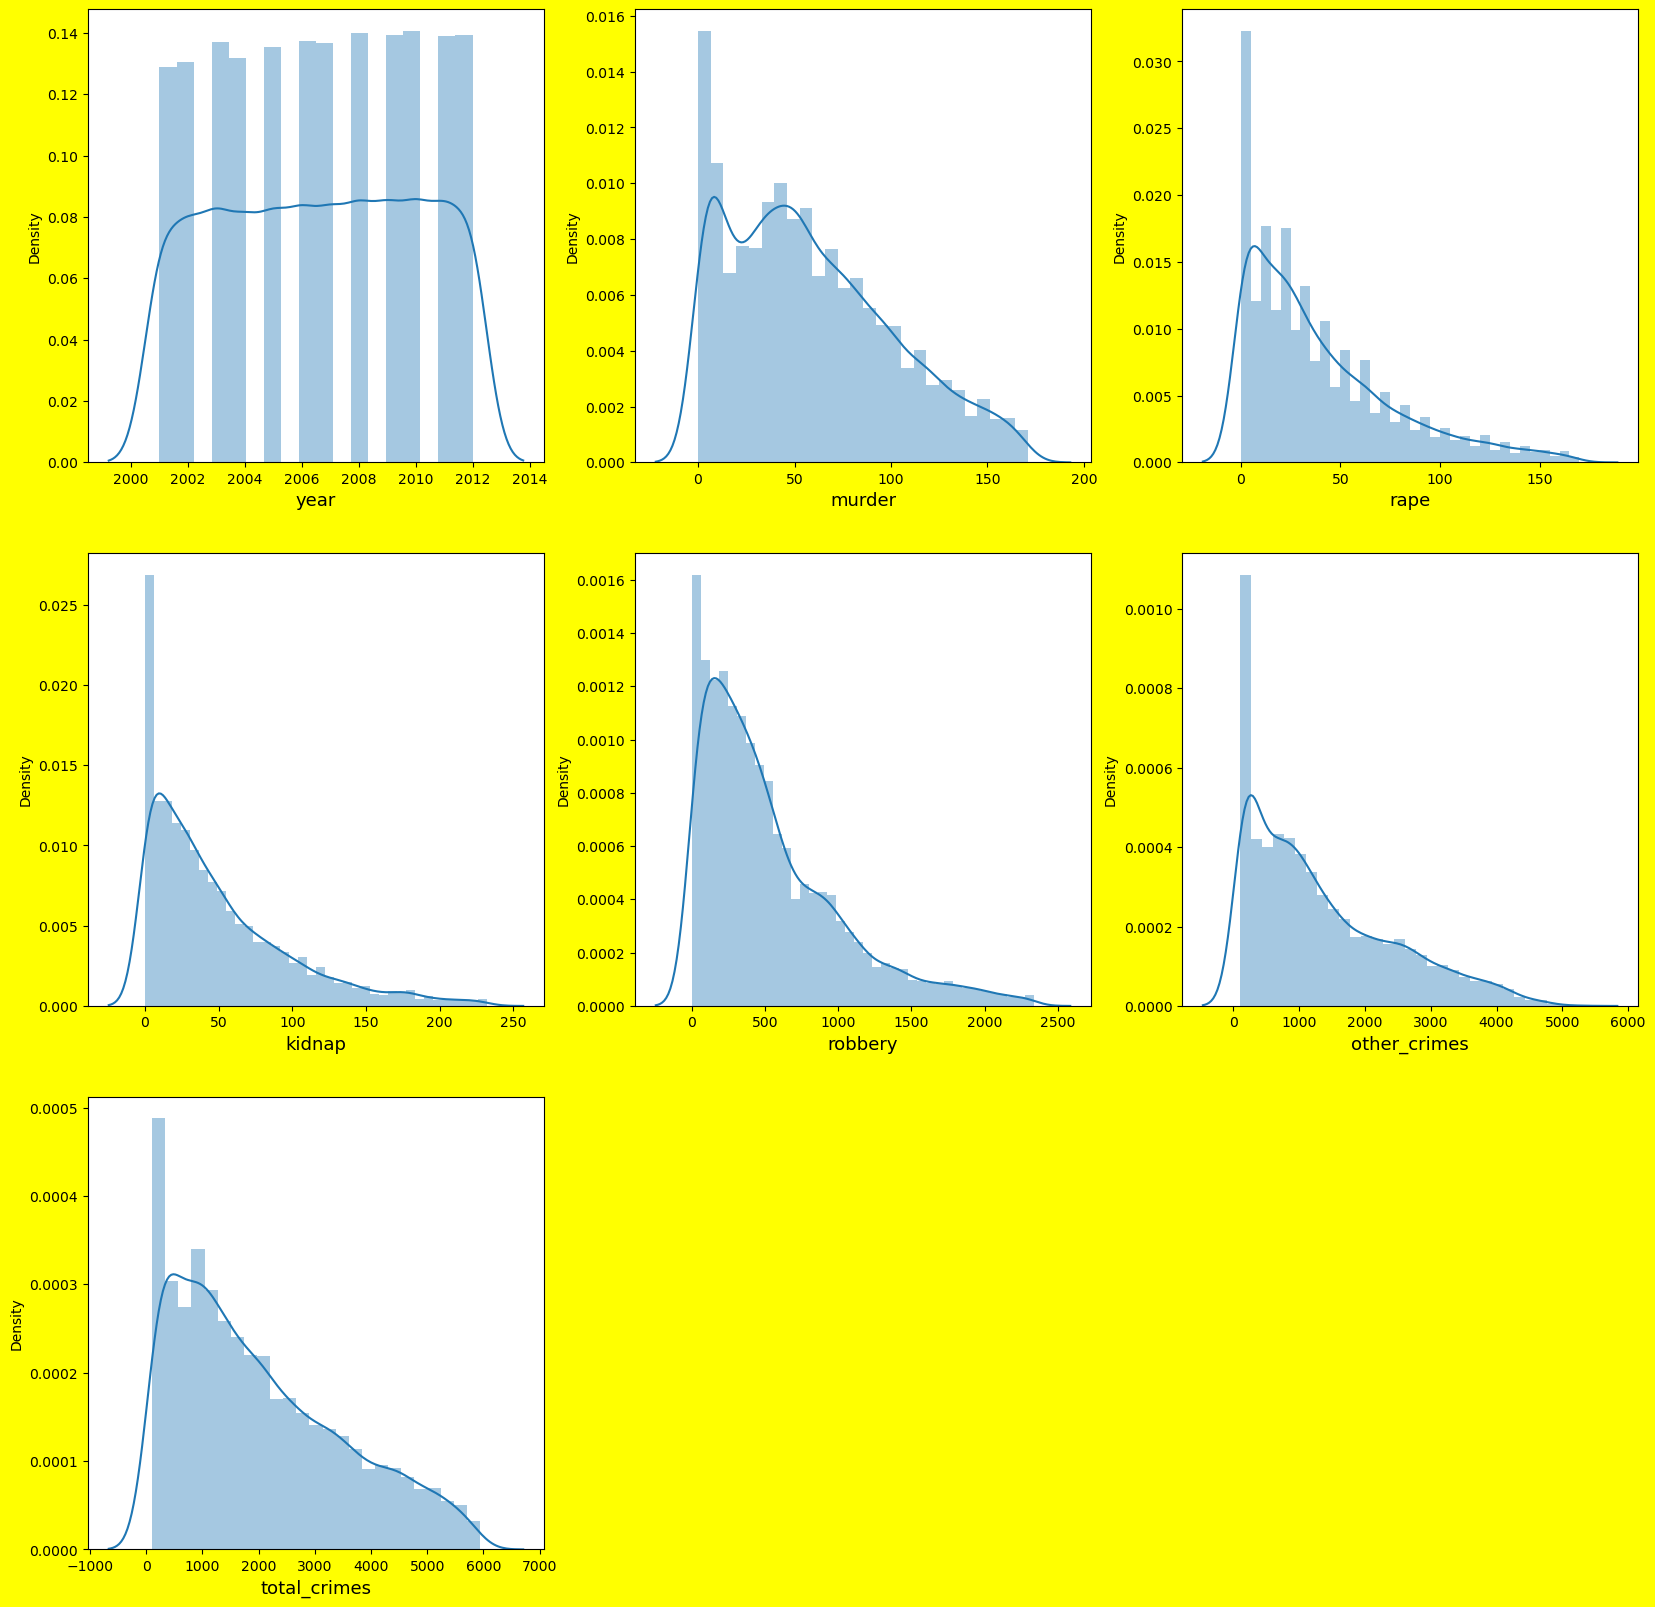

In [44]:
plt.figure(figsize=(20,20),facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber <=7 :
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=13)
        
    plotnumber+=1
plt.show()

In [264]:
#after removing ther
df.describe()

,year,murder,rape,kidnap,robbery,other_crimes,total_crimes,%age of Murder,%age of rape,%age of kidnap,%age of robbery,%age of Other_crimes),%age of total_crimes)
count,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000
mean,2006.581606,58.842384,39.397973,49.568295,533.413856,1343.454545,2024.677053,3.551762,2.201243,2.763438,26.112961,65.370595,inf
std,3.439002,42.399893,36.771832,47.575754,472.572638,1096.833054,1493.398083,2.960618,1.950561,2.517826,14.645954,14.626684,NaN
min,2001.000000,0.000000,0.000000,0.000000,0.000000,104.000000,104.000000,0.000000,0.000000,0.000000,0.000000,8.247863,258.282209
25%,2004.000000,24.000000,10.000000,14.000000,180.500000,431.000000,809.000000,1.709402,0.812038,0.972355,16.964056,57.948670,2187.984962
50%,2007.000000,52.000000,28.000000,36.000000,401.000000,1035.000000,1678.000000,2.693310,1.720430,2.030009,22.873346,66.830547,3712.903226
75%,2010.000000,87.000000,58.000000,72.000000,765.000000,2024.500000,3046.000000,4.570415,3.059689,3.808308,31.259446,75.137529,5850.000000
max,2012.000000,171.000000,170.000000,232.000000,2339.000000,5269.000000,5936.000000,38.717340,15.176152,17.851240,90.490933,100.000000,inf


In [267]:
df.drop(['%age of total_crimes)'], axis=1)
df

,year,murder,rape,kidnap,robbery,other_crimes,total_crimes,district,%age of Murder,%age of rape,%age of kidnap,%age of robbery,%age of Other_crimes),%age of total_crimes)
0,2001,161,100,92,646,3268,4267,ADILABAD,3.773143,2.343567,2.156082,15.139442,76.587767,2.650311e+03
3,2001,133,40,50,449,2614,3286,CUDDAPAH,4.047474,1.217285,1.521607,13.664029,79.549604,2.470677e+03
5,2001,4,0,0,331,217,552,GUNTAKAL RLY.,0.724638,0.000000,0.000000,59.963768,39.311594,1.380000e+04
9,2001,153,94,82,922,3545,4796,KHAMMAM,3.190158,1.959967,1.709758,19.224354,73.915763,3.134641e+03
10,2001,116,74,72,1137,3699,5098,KRISHNA,2.275402,1.451550,1.412319,22.302864,72.557866,4.394828e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8584,2012,15,10,56,782,529,1392,NEW DELHI,1.077586,0.718391,4.022989,56.178161,38.002874,9.280000e+03
8592,2012,1,0,0,0,107,108,STF,0.925926,0.000000,0.000000,0.000000,99.074074,1.080000e+04
8594,2012,0,0,0,17,153,170,LAKSHADWEEP,0.000000,0.000000,0.000000,10.000000,90.000000,inf
8595,2012,11,12,4,187,746,960,KARAIKAL,1.145833,1.250000,0.416667,19.479167,77.708333,8.727273e+03


# After removing the outliers our data looks like this. We will use this data to define the Peaceful, Moderate and Sensitive areas based on the total crime rates

In [312]:
df['%age of Murder']=(df['murder']/df['total_crimes'])*100
df['%age of rape']=(df['rape']/df['total_crimes'])*100
df['%age of kidnap']=(df['kidnap']/df['total_crimes'])*100
df['%age of robbery']=(df['robbery']/df['total_crimes'])*100
df['%age of Other_crimes)']=(df['other_crimes']/df['total_crimes'])*100
df.drop(['%age of total_crimes)'],axis=1,inplace=True)
df

,year,murder,rape,kidnap,robbery,other_crimes,total_crimes,district,%age of Murder,%age of rape,%age of kidnap,%age of robbery,%age of Other_crimes)
0,2001,161,100,92,646,3268,4267,ADILABAD,3.773143,2.343567,2.156082,15.139442,76.587767
3,2001,133,40,50,449,2614,3286,CUDDAPAH,4.047474,1.217285,1.521607,13.664029,79.549604
5,2001,4,0,0,331,217,552,GUNTAKAL RLY.,0.724638,0.000000,0.000000,59.963768,39.311594
9,2001,153,94,82,922,3545,4796,KHAMMAM,3.190158,1.959967,1.709758,19.224354,73.915763
10,2001,116,74,72,1137,3699,5098,KRISHNA,2.275402,1.451550,1.412319,22.302864,72.557866
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8584,2012,15,10,56,782,529,1392,NEW DELHI,1.077586,0.718391,4.022989,56.178161,38.002874
8592,2012,1,0,0,0,107,108,STF,0.925926,0.000000,0.000000,0.000000,99.074074
8594,2012,0,0,0,17,153,170,LAKSHADWEEP,0.000000,0.000000,0.000000,10.000000,90.000000
8595,2012,11,12,4,187,746,960,KARAIKAL,1.145833,1.250000,0.416667,19.479167,77.708333


# 1. Most sensitive Areas

In [358]:
df_sensitive = df.loc[df['total_crimes']>=4000]
df_sensitive

,year,murder,rape,kidnap,robbery,other_crimes,total_crimes,district,%age of Murder,%age of rape,%age of kidnap,%age of robbery,%age of Other_crimes)
0,2001,161,100,92,646,3268,4267,ADILABAD,3.773143,2.343567,2.156082,15.139442,76.587767
9,2001,153,94,82,922,3545,4796,KHAMMAM,3.190158,1.959967,1.709758,19.224354,73.915763
10,2001,116,74,72,1137,3699,5098,KRISHNA,2.275402,1.451550,1.412319,22.302864,72.557866
15,2001,158,92,180,1490,3764,5684,NELLORE,2.779733,1.618578,3.166784,26.213934,66.220971
113,2001,141,138,40,1973,2725,5017,BILASPUR,2.810444,2.750648,0.797289,39.326291,54.315328
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8438,2012,88,28,58,325,4181,4680,TRICHY RURAL,1.880342,0.598291,1.239316,6.944444,89.337607
8442,2012,159,46,78,709,4713,5705,VIRUDHUNAGAR,2.787029,0.806310,1.367222,12.427695,82.611744
8543,2012,85,72,154,2049,2626,4986,ASANSOL,1.704773,1.444043,3.088648,41.095066,52.667469
8545,2012,50,26,106,1777,2241,4200,BDN CP,1.190476,0.619048,2.523810,42.309524,53.357143


<Axes: >

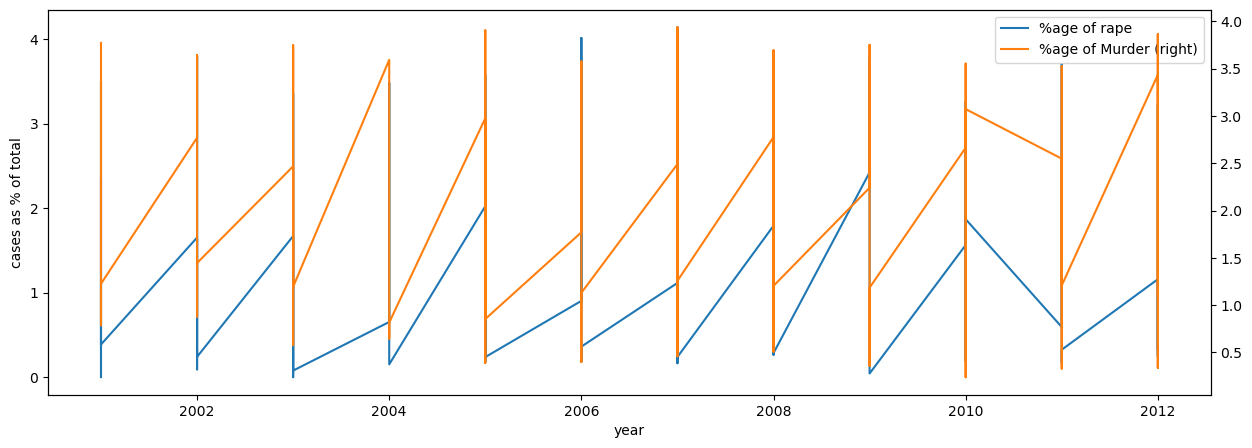

In [375]:
fig, ax = plt.subplots(figsize=(15,5))
df_sensitive.plot(x="year", y="%age of rape", ylabel = "cases as % of total", ax=ax)
df_sensitive.plot(x="year", y="%age of Murder", ax=ax, secondary_y=True)

# 2. Moderate Areas

In [359]:
df_Moderate = df.loc[(df['total_crimes']>=2000) & (df['total_crimes']<4000)]
df_Moderate

,year,murder,rape,kidnap,robbery,other_crimes,total_crimes,district,%age of Murder,%age of rape,%age of kidnap,%age of robbery,%age of Other_crimes)
3,2001,133,40,50,449,2614,3286,CUDDAPAH,4.047474,1.217285,1.521607,13.664029,79.549604
13,2001,157,70,52,844,2644,3767,MEDAK,4.167773,1.858243,1.380409,22.405097,70.188479
16,2001,155,42,76,655,2838,3766,NIZAMABAD,4.115773,1.115242,2.018056,17.392459,75.358471
20,2001,48,16,24,585,2141,2814,SRIKAKULAM,1.705757,0.568586,0.852878,20.788913,76.083866
23,2001,87,24,24,413,2803,3351,VISAKHA RURAL,2.596240,0.716204,0.716204,12.324679,83.646673
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8532,2012,66,60,86,1291,1190,2693,DEHRADUN,2.450798,2.227999,3.193465,47.939101,44.188637
8533,2012,128,94,212,1388,1430,3252,HARIDWAR,3.936039,2.890529,6.519065,42.681427,43.972940
8539,2012,102,60,190,1073,1407,2832,UDHAMSINGH NAGAR,3.601695,2.118644,6.709040,37.888418,49.682203
8544,2012,98,70,168,510,2166,3012,BANKURA,3.253652,2.324037,5.577689,16.932271,71.912351


<Axes: >

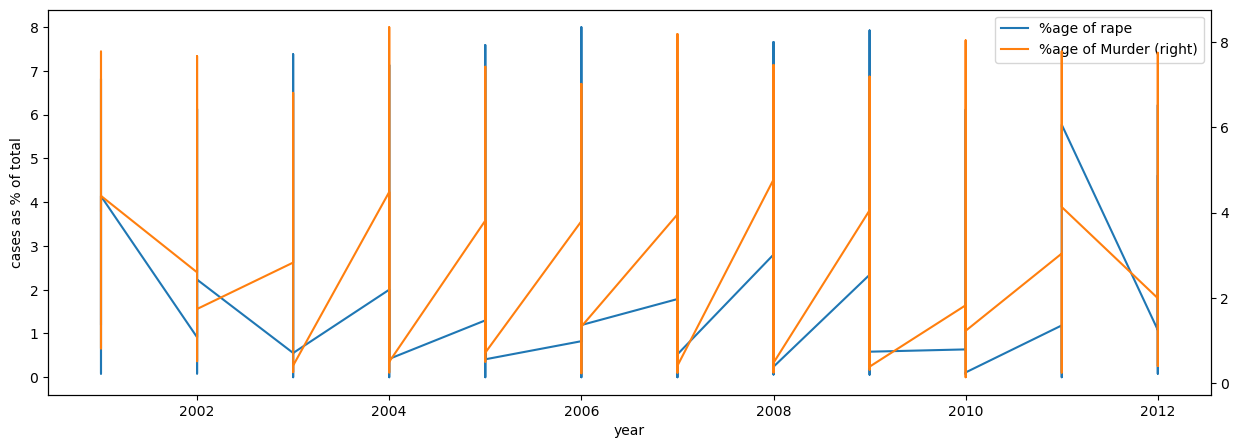

In [374]:
fig, ax = plt.subplots(figsize=(15,5))
df_Moderate.plot(x="year", y="%age of rape", ylabel = "cases as % of total", ax=ax)
df_Moderate.plot(x="year", y="%age of Murder", ax=ax, secondary_y=True)

# 3. Peaceful Areas

In [360]:
df_Peaceful = df.loc[(df['total_crimes']<=2000)]
df_Peaceful

,year,murder,rape,kidnap,robbery,other_crimes,total_crimes,district,%age of Murder,%age of rape,%age of kidnap,%age of robbery,%age of Other_crimes)
5,2001,4,0,0,331,217,552,GUNTAKAL RLY.,0.724638,0.000000,0.000000,59.963768,39.311594
19,2001,6,0,0,604,223,833,SECUNDERABAD RLY.,0.720288,0.000000,0.000000,72.509004,26.770708
22,2001,3,2,0,531,148,684,VIJAYAWADA RLY.,0.438596,0.292398,0.000000,77.631579,21.637427
28,2001,13,2,6,75,189,285,CHANGLANG,4.561404,0.701754,2.105263,26.315789,66.315789
29,2001,8,4,8,63,178,261,DIBANG VALLEY,3.065134,1.532567,3.065134,24.137931,68.199234
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8583,2012,1,0,2,138,160,301,IGI AIRPORT,0.332226,0.000000,0.664452,45.847176,53.156146
8584,2012,15,10,56,782,529,1392,NEW DELHI,1.077586,0.718391,4.022989,56.178161,38.002874
8592,2012,1,0,0,0,107,108,STF,0.925926,0.000000,0.000000,0.000000,99.074074
8594,2012,0,0,0,17,153,170,LAKSHADWEEP,0.000000,0.000000,0.000000,10.000000,90.000000


<Axes: >

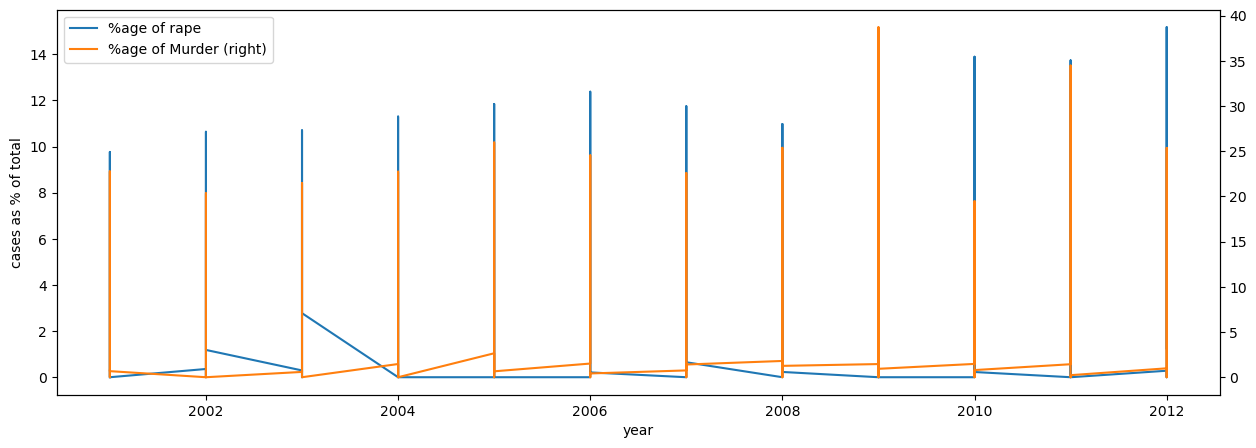

In [372]:
fig, ax = plt.subplots(figsize=(15,5))
df_Peaceful.plot(x="year", y="%age of rape", ylabel = "cases as % of total", ax=ax)
df_Peaceful.plot(x="year", y="%age of Murder", ax=ax, secondary_y=True)

In [286]:
#dataset
X =df[['year','murder','rape','kidnap','robbery','other_crimes','total_crimes']]
X.head()

,year,murder,rape,kidnap,robbery,other_crimes,total_crimes
0,2001,161,100,92,646,3268,4267
3,2001,133,40,50,449,2614,3286
5,2001,4,0,0,331,217,552
9,2001,153,94,82,922,3545,4796
10,2001,116,74,72,1137,3699,5098


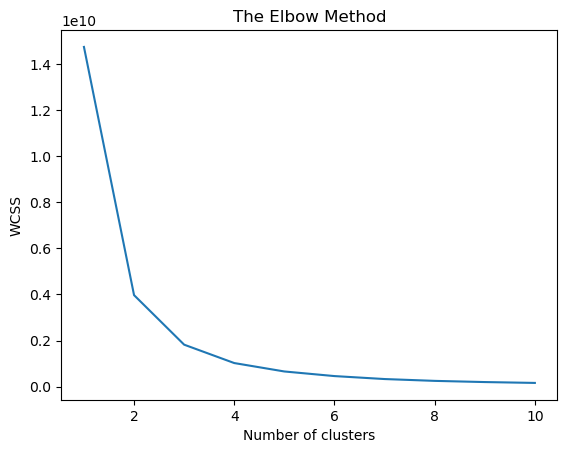

In [241]:
#Elbow method
from sklearn.cluster import KMeans

wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [356]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[1 2 0 ... 0 0 1]


# Model Evaluation

In [277]:
# Just like in supervised learning we have a metric in unsupervised learning as well
from sklearn.metrics import silhouette_score

In [357]:
silhouette_score(X,y_kmeans)

0.5291626304188962

# Sample prediction

In [279]:
#It predicts the cluster number to which the datapoint belongs to
test=kmeans.predict(np.array([[2001,161,100,92,646,3268,4267]]))
test[0]

1

# 1. Sensitive areas belongs to cluster_1_states

Observations why Sensitive:
    
    1. These are the most sensitive district in INDIA for crimes
    2. Considered the most number of crimes in the other IPC crimes 
    3. In order to stop the crimes, we need to increase the number of courts and judges to reduce the backlog of cases.
    4. Need to implement measures to improve witness protection and enhance the efficiency of the criminal justice system.
    5. Crime prevention awareness programs is critical to maintain law and order in the country.
    6. Here are the top 20 stratergies that can be implemented to help reduce the crimes -- 
        1. Help Victims of Crime
        2. Reduce Demand for Law Enforcement
        3. Fixing Distressed Spaces
        4. Making Crime Attractors Less Appealing 
        5. Scientific Supports for Law Enforcement 
        6. Improving the Job Market and Job Training
        7. Facilitate Neighborhood Non-Profits
        8. Make Jails and Prison Less Criminogenic
        9. Better Prepare People to Return Home from Prison
        10. Fund Community-Based Violence Interruption
        11. Use Technology to Reduce Violence
        12. Tackle the Causes and Consequences of Poverty
        13. Fix Long-Standing Problems 
        14. Shorten the Reach of the Criminal Justice System
        15. Help Those with Substance-Use Disorders 
        16. Support Programs for High-Risk Young People and Families
        17. Education - Improving education is its own crime-reducing category, but schools can facilitate crime reduction outside of schools. Reducing food insecurity, humanizing discipline and improving the safety of the school commute benefit everyone. 
        18. Housing - Like education, housing is its own category beyond the scope of this essay. But there are housing solutions with specific crime-reducing benefits: permanent, supportive housing; transitional housing for young people leaving homelessness; and housing programs specifically for people who cycle through emergency services. 
        19. Policy and Law - There are any number of laws and regulations that could be tweaked to meaningfully reduce crime and victimization. For example, higher taxes that specifically target the overuse of criminogenic products like guns and alcohol have been shown to reduce excess demand. 
        20. Stop the Proliferation of Firearms -the more guns, the more crime.
    
    https://www.vitalcitynyc.org/articles/twenty-strategies-for-reducing-crime-in-cities
    

In [314]:
df_sensitive= df[y_kmeans==1]
df_sensitive = df.loc[df['total_crimes']>=4000]
df_sensitive

,year,murder,rape,kidnap,robbery,other_crimes,total_crimes,district,%age of Murder,%age of rape,%age of kidnap,%age of robbery,%age of Other_crimes)
0,2001,161,100,92,646,3268,4267,ADILABAD,3.773143,2.343567,2.156082,15.139442,76.587767
9,2001,153,94,82,922,3545,4796,KHAMMAM,3.190158,1.959967,1.709758,19.224354,73.915763
10,2001,116,74,72,1137,3699,5098,KRISHNA,2.275402,1.451550,1.412319,22.302864,72.557866
15,2001,158,92,180,1490,3764,5684,NELLORE,2.779733,1.618578,3.166784,26.213934,66.220971
113,2001,141,138,40,1973,2725,5017,BILASPUR,2.810444,2.750648,0.797289,39.326291,54.315328
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8438,2012,88,28,58,325,4181,4680,TRICHY RURAL,1.880342,0.598291,1.239316,6.944444,89.337607
8442,2012,159,46,78,709,4713,5705,VIRUDHUNAGAR,2.787029,0.806310,1.367222,12.427695,82.611744
8543,2012,85,72,154,2049,2626,4986,ASANSOL,1.704773,1.444043,3.088648,41.095066,52.667469
8545,2012,50,26,106,1777,2241,4200,BDN CP,1.190476,0.619048,2.523810,42.309524,53.357143


<Axes: >

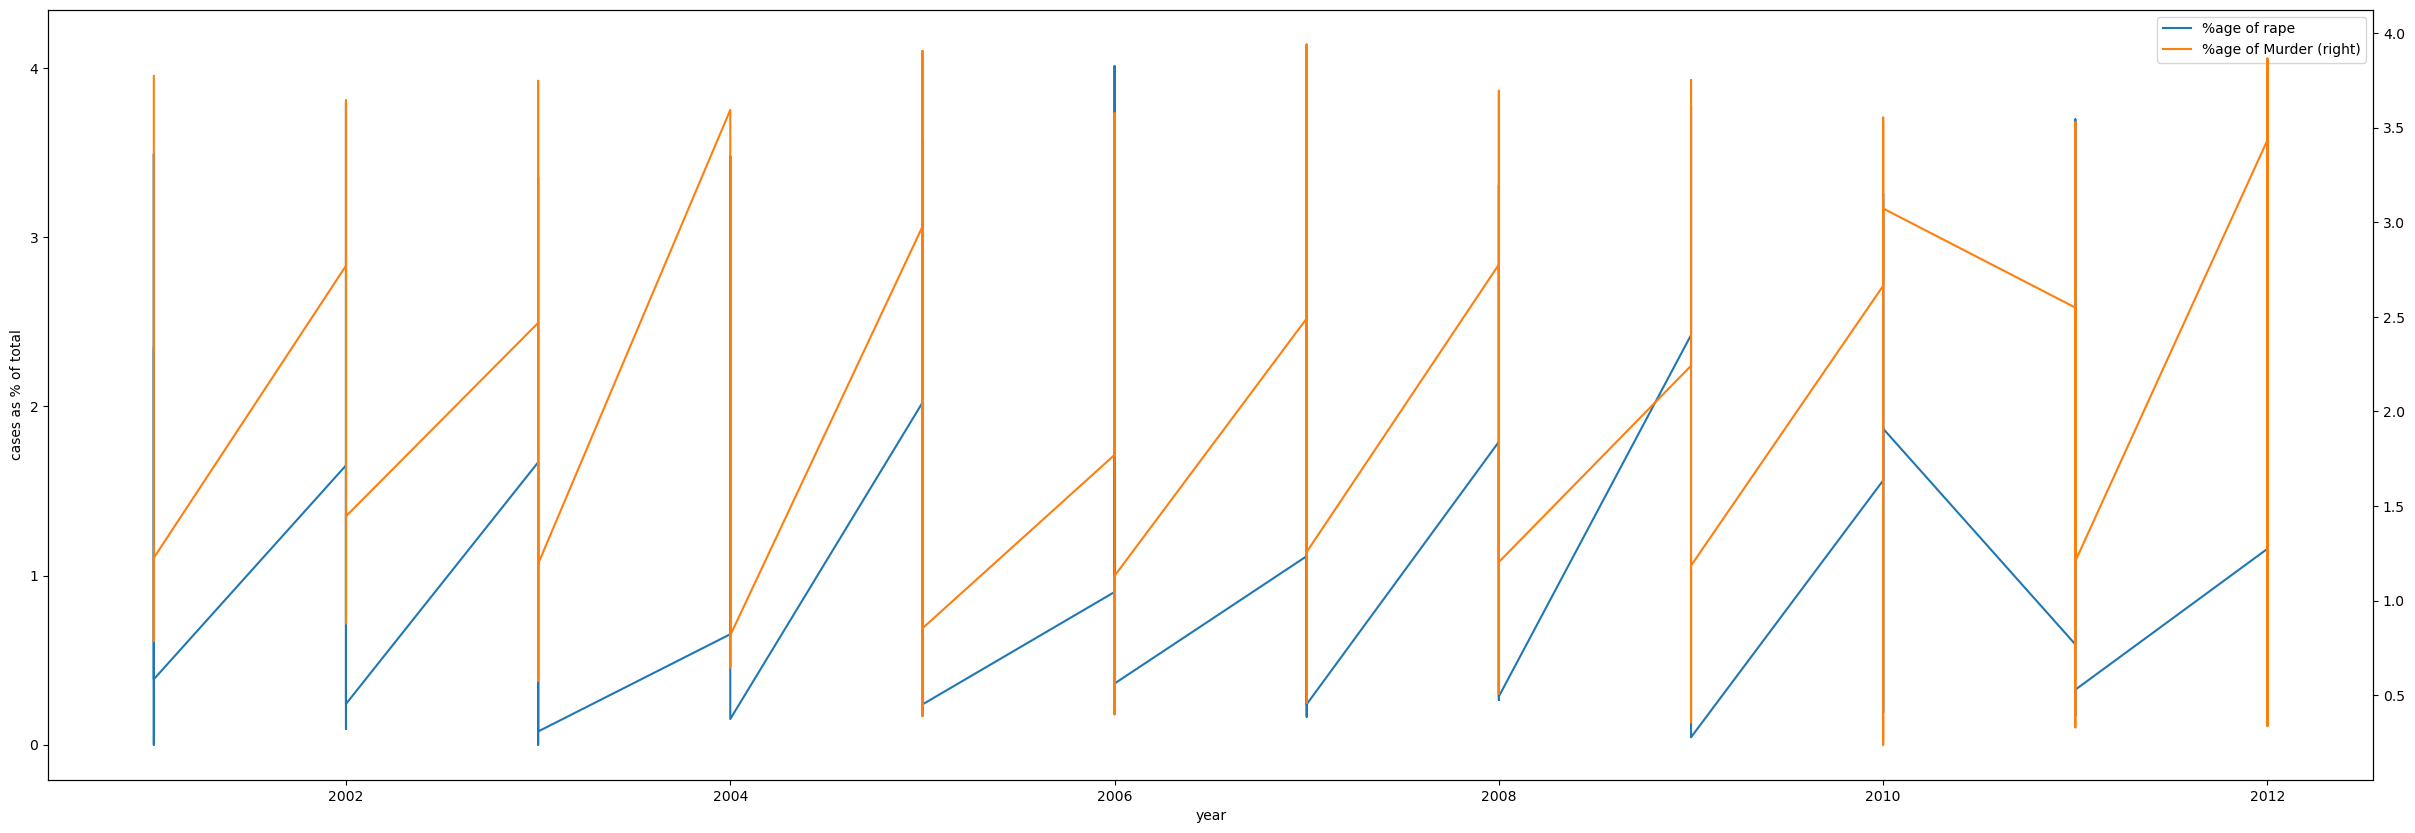

In [355]:
fig, ax = plt.subplots(figsize=(30,10))
df_sensitive.plot(x="year", y="%age of rape", ylabel = "cases as % of total", ax=ax)
df_sensitive.plot(x="year", y="%age of Murder", ax=ax, secondary_y=True)

# 2. Moderate Area's belongs to the cluster_2_states

Observations why Moderate:

1. It seems like CHAMARAJNAGAR is the most moderate crime districts
2. Low highly offensive crimes

In [315]:
df_Moderate= df[y_kmeans==2]
df_Moderate = df.loc[(df['total_crimes']>=2000) & (df['total_crimes']<4000)]
df_Moderate

,year,murder,rape,kidnap,robbery,other_crimes,total_crimes,district,%age of Murder,%age of rape,%age of kidnap,%age of robbery,%age of Other_crimes)
3,2001,133,40,50,449,2614,3286,CUDDAPAH,4.047474,1.217285,1.521607,13.664029,79.549604
13,2001,157,70,52,844,2644,3767,MEDAK,4.167773,1.858243,1.380409,22.405097,70.188479
16,2001,155,42,76,655,2838,3766,NIZAMABAD,4.115773,1.115242,2.018056,17.392459,75.358471
20,2001,48,16,24,585,2141,2814,SRIKAKULAM,1.705757,0.568586,0.852878,20.788913,76.083866
23,2001,87,24,24,413,2803,3351,VISAKHA RURAL,2.596240,0.716204,0.716204,12.324679,83.646673
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8532,2012,66,60,86,1291,1190,2693,DEHRADUN,2.450798,2.227999,3.193465,47.939101,44.188637
8533,2012,128,94,212,1388,1430,3252,HARIDWAR,3.936039,2.890529,6.519065,42.681427,43.972940
8539,2012,102,60,190,1073,1407,2832,UDHAMSINGH NAGAR,3.601695,2.118644,6.709040,37.888418,49.682203
8544,2012,98,70,168,510,2166,3012,BANKURA,3.253652,2.324037,5.577689,16.932271,71.912351


<Axes: >

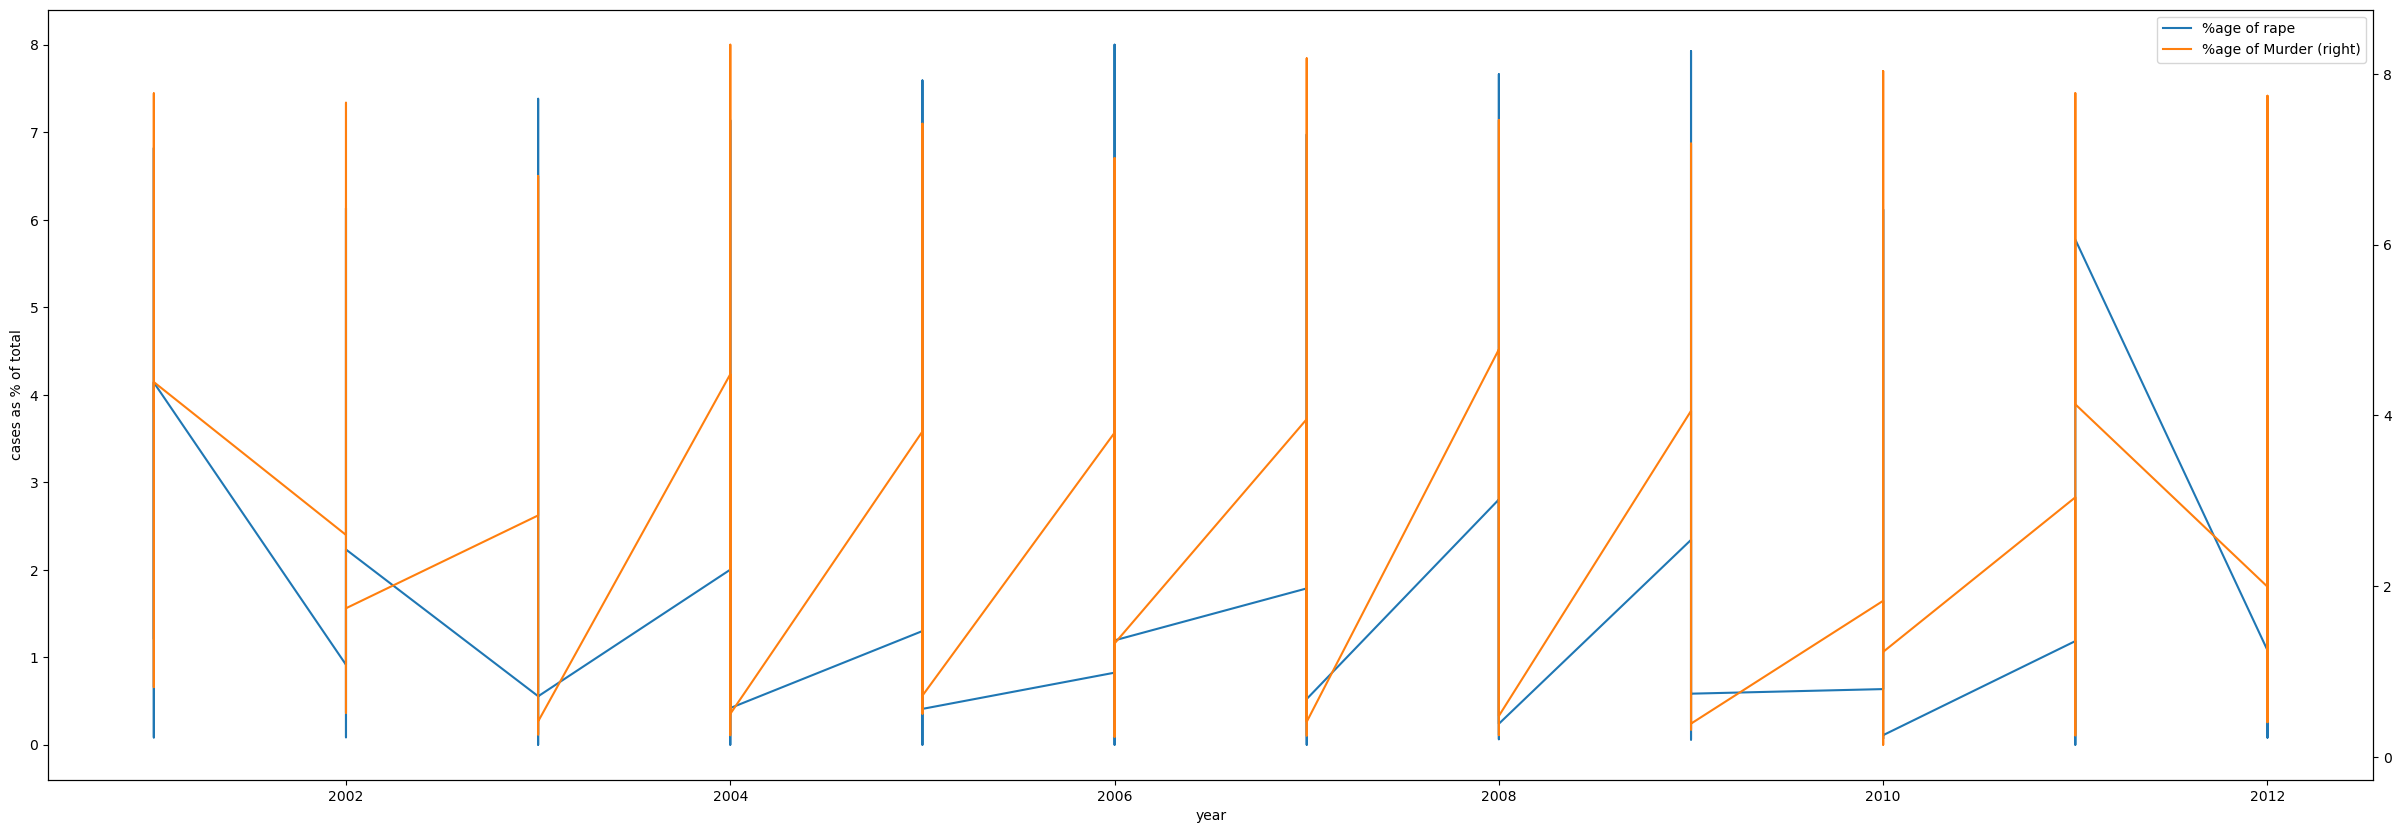

In [354]:
fig, ax = plt.subplots(figsize=(30,10))
df_Moderate.plot(x="year", y="%age of rape", ylabel = "cases as % of total", ax=ax)
df_Moderate.plot(x="year", y="%age of Murder", ax=ax, secondary_y=True)

# 3. Peaceful Area's belongs to the cluster_0_states

Observations why it's the most peaceful area:

1. These are the most peaceful districts in India where almost very less number of crimes have happened
2. Most underrated place resulted in less people gatherings
3. Less crime prone areas as compared to the areas where the population is higher, less roberry prone areas etc

In [317]:
df_Peaceful= df[y_kmeans==0]
df_Peaceful = df.loc[(df['total_crimes']<=2000)]
df_Peaceful

,year,murder,rape,kidnap,robbery,other_crimes,total_crimes,district,%age of Murder,%age of rape,%age of kidnap,%age of robbery,%age of Other_crimes)
5,2001,4,0,0,331,217,552,GUNTAKAL RLY.,0.724638,0.000000,0.000000,59.963768,39.311594
19,2001,6,0,0,604,223,833,SECUNDERABAD RLY.,0.720288,0.000000,0.000000,72.509004,26.770708
22,2001,3,2,0,531,148,684,VIJAYAWADA RLY.,0.438596,0.292398,0.000000,77.631579,21.637427
28,2001,13,2,6,75,189,285,CHANGLANG,4.561404,0.701754,2.105263,26.315789,66.315789
29,2001,8,4,8,63,178,261,DIBANG VALLEY,3.065134,1.532567,3.065134,24.137931,68.199234
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8583,2012,1,0,2,138,160,301,IGI AIRPORT,0.332226,0.000000,0.664452,45.847176,53.156146
8584,2012,15,10,56,782,529,1392,NEW DELHI,1.077586,0.718391,4.022989,56.178161,38.002874
8592,2012,1,0,0,0,107,108,STF,0.925926,0.000000,0.000000,0.000000,99.074074
8594,2012,0,0,0,17,153,170,LAKSHADWEEP,0.000000,0.000000,0.000000,10.000000,90.000000


<Axes: >

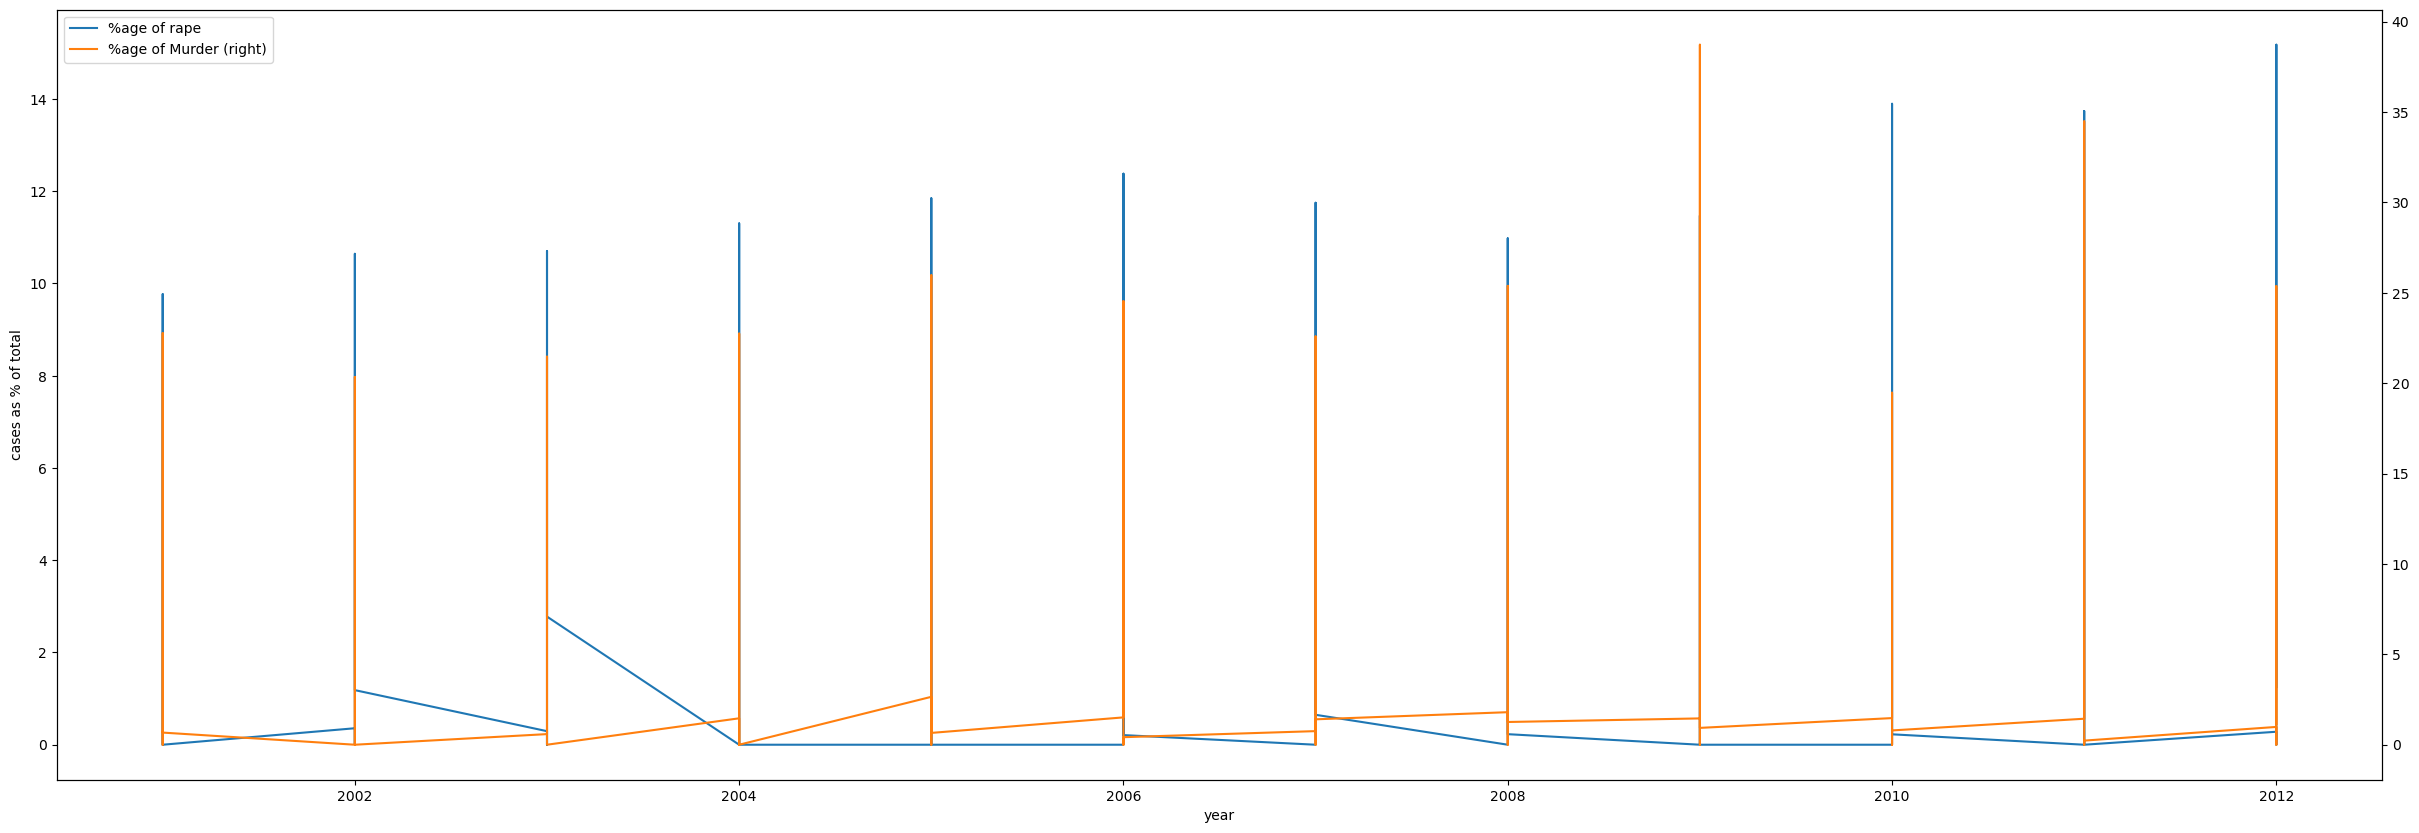

In [353]:
fig, ax = plt.subplots(figsize=(30,10))
df_Peaceful.plot(x="year", y="%age of rape", ylabel = "cases as % of total", ax=ax)
df_Peaceful.plot(x="year", y="%age of Murder", ax=ax, secondary_y=True)